In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
sms = pd.read_csv('C:/Users/Abd ur Rehman/Desktop/Tahir Thesis Work/spam message/Spam Data set/spamm_data.csv', encoding='latin-1')
sms.head()

,r1,r2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,valid,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,valid,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,valid,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,valid,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


C:\Users\Abd ur Rehman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='r1', ylabel='count'>

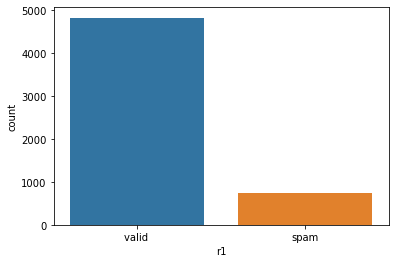

In [45]:
sns.countplot(sms['r1'])

In [46]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   r1          5572 non-null   object
 1   r2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [47]:
sms.isnull().sum()

r1               0
r2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [48]:
sms=sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms.isnull().sum()

r1    0
r2    0
dtype: int64

In [49]:
sms=sms.rename({'r1':'label','r2':'text'},axis=1)
sms.head()

,label,text
0,valid,"Go until jurong point, crazy.. Available only ..."
1,valid,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,valid,U dun say so early hor... U c already then say...
4,valid,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
ps=PorterStemmer()
def preprocess(x):
    x = x.lower()
    x = re.sub(r'[^0-9a-zA-Z]', ' ', x)
    x = re.sub(r'\s+', ' ', x)
    l = [item for item in x if item not in string.punctuation]
    processed=[ps.stem(i) for i in l if i not in stopwords.words('english')]
    return processed

In [51]:
X=sms['text']
y=sms['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
import string

def model(model_name,X_train,y_train,X_test,y_test):
    pipeline=Pipeline([
    ('bow', CountVectorizer(analyzer=preprocess)),
    ('tfidf', TfidfTransformer()),
    ('model', model_name),
    ])
    pipeline.fit(X_train,y_train)

    preds=pipeline.predict(X_test)

    print (classification_report(y_test,preds))
    print (confusion_matrix(y_test,preds))
    print('Accuracy:', pipeline.score(X_test, y_test)*100)
    print("Training Score:",pipeline.score(X_train,y_train)*100)
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test,preds)
    return score

In [53]:
mnb=model(MultinomialNB(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

        spam       0.94      0.63      0.76       224
      valid        0.95      0.99      0.97      1448

    accuracy                           0.95      1672
   macro avg       0.94      0.81      0.86      1672
weighted avg       0.95      0.95      0.94      1672

[[ 142   82]
 [   9 1439]]
Accuracy: 94.55741626794259
Training Score: 94.35897435897435


In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=model(RandomForestClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

        spam       0.94      0.81      0.87       224
      valid        0.97      0.99      0.98      1448

    accuracy                           0.97      1672
   macro avg       0.96      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672

[[ 181   43]
 [  11 1437]]
Accuracy: 96.77033492822966
Training Score: 99.66666666666667


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gb=model(GradientBoostingClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

        spam       0.96      0.83      0.89       224
      valid        0.97      0.99      0.98      1448

    accuracy                           0.97      1672
   macro avg       0.97      0.91      0.94      1672
weighted avg       0.97      0.97      0.97      1672

[[ 185   39]
 [   8 1440]]
Accuracy: 97.188995215311
Training Score: 98.76923076923076


In [56]:
from sklearn.svm import SVC
svc=model(SVC(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

        spam       0.95      0.74      0.83       224
      valid        0.96      0.99      0.98      1448

    accuracy                           0.96      1672
   macro avg       0.96      0.87      0.91      1672
weighted avg       0.96      0.96      0.96      1672

[[ 166   58]
 [   8 1440]]
Accuracy: 96.05263157894737
Training Score: 96.74358974358974


In [72]:
from sklearn.linear_model import LogisticRegression
# Train the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [73]:
# Evaluate the logistic regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [76]:
# Print the evaluation metrics for the logistic regression model
print('Logistic Regression Model Evaluation Metrics:')
print('Accuracy: {:.4f}'.format(accuracy_logreg))

Logistic Regression Model Evaluation Metrics:
Accuracy: 0.9701


,Model,Accuracy_score
2,GBoost,0.971890
4,Logistic Regression,0.970096
1,RF,0.967703
3,SVC,0.960526
0,MNB,0.945574


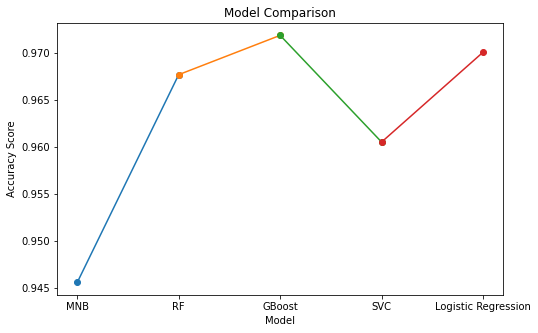

In [84]:
models = pd.DataFrame({
    'Model': ['MNB', 'RF', 'GBoost', 'SVC', 'Logistic Regression'],
    'Accuracy_score': [mnb, rf, gb, svc, accuracy_logreg]
})

# Sort the dataframe by accuracy score
models = models.sort_values(by='Accuracy_score', ascending=False)
# Display the table
display(models)

fig, ax = plt.subplots(figsize=(8, 5))

# Plot the line chart
# Set different colors for each line
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for i in range(len(models) - 1):
    ax.plot([models['Model'][i], models['Model'][i+1]],
            [models['Accuracy_score'][i], models['Accuracy_score'][i+1]],
            marker='o', color=colors[i])

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy Score')
ax.set_title('Model Comparison')

plt.show()

,Model,Accuracy_score
2,GBoost,0.971890
4,Logistic Regression,0.970096
1,RF,0.967703
3,SVC,0.960526
0,MNB,0.945574


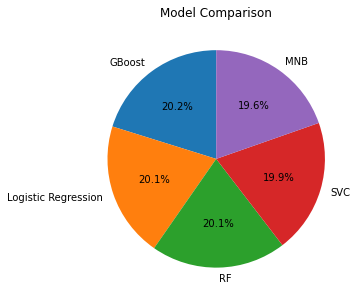

In [81]:
models = pd.DataFrame({
    'Model': ['MNB', 'RF', 'GBoost', 'SVC', 'Logistic Regression'],
    'Accuracy_score': [mnb, rf, gb, svc, accuracy_logreg]
})

# Sort the dataframe by accuracy score
models = models.sort_values(by='Accuracy_score', ascending=False)
# Display the table
display(models)

fig, ax = plt.subplots(figsize=(8, 5))

# Plot the pie chart
# Set different colors for each slice
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
ax.pie(models['Accuracy_score'], labels=models['Model'], colors=colors, autopct='%1.1f%%', startangle=90)

# Add title
ax.set_title('Model Comparison')

plt.show()